<a href="https://colab.research.google.com/github/duyqu-chan/THY-Travel-Datathon/blob/master/TravelDatathon_preselection_no_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#THY Travel Datathon Preselection Case Study

by Duygu Can, Meriç Pakkan, Neslihan Oflaz


Flying passengers can check-in through the web site, applications, kiosks and counters. In this case study content, the train data including the number of seven-month passenger check-in operations is provided. We want you to estimate the number of channels (column Operation_Count) in the csv file attached.

Mount drive to load the data:

In [58]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Expolaration

Upload the data by reading provided .csv files from Google Drive (change path if needed). There are 808696 samples in the training and 121921 instances in the test sets. Each has 23 features.

In [59]:
import pandas as pd
train_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Train Data.csv")
result_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Result File.csv")
print(train_df.shape)
print(result_df.shape)
train_df.head()

(808696, 23)
(121921, 23)


,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
0,20190326,20190326,KDT,KDT,?,032363,KS,?,QC,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,1
1,20180321,20180321,KDT,KDT,?,03F960,KS,?,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,1,0,0,1
2,20190322,20190322,KDT,KDT,?,03AA2P,KS,Y011161,QC,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,1
3,20180515,20180515,KDT,KDT,?,0353D0,MK,?,TS,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,2
4,20190420,20190420,KDT,KDT,?,03F902,KS,Y013437,QC,MISTER,M,?,?,1,Y,0,0,0,1,0,0,0,1


Check what data types we have:

In [60]:
train_df.dtypes

Departure_YMD_LMT             int64
Operation_YMD_LMT             int64
Departure_Airport            object
Operation_Airport            object
Terminal_Number              object
Terminal_Name                object
Operation_Initials           object
Operation_Sonic_Code         object
Operation_Channel            object
Passenger_Title              object
Passenger_Gender             object
Inbound_Departure_Airport    object
Outbound_Arrival_Airport     object
SWC_FLY                       int64
Cabin_Class                  object
SWC_FQTV_Member               int64
Passenger_Baggage_Count       int64
Passenger_Baggage_Weight      int64
SWC_Staff                     int64
SWC_CIP_Passenger             int64
SWC_VIP_Passenger             int64
SWC_Has_Infant                int64
Operation_Count               int64
dtype: object

In the *Departure_YMD_LMT* and the *Operation_YMD_LMT* colums, date of departure and date of check is stored so it is convenient to convert them to date time objects.

In [0]:
train_df['Departure_YMD_LMT'] = pd.to_datetime(train_df['Departure_YMD_LMT'], format='%Y%m%d')
train_df['Operation_YMD_LMT'] = pd.to_datetime(train_df['Operation_YMD_LMT'], format='%Y%m%d')
result_df['Departure_YMD_LMT'] = pd.to_datetime(result_df['Departure_YMD_LMT'], format='%Y%m%d')
result_df['Operation_YMD_LMT'] = pd.to_datetime(result_df['Operation_YMD_LMT'], format='%Y%m%d')

In [62]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                    object
Operation_Airport                    object
Terminal_Number                      object
Terminal_Name                        object
Operation_Initials                   object
Operation_Sonic_Code                 object
Operation_Channel                    object
Passenger_Title                      object
Passenger_Gender                     object
Inbound_Departure_Airport            object
Outbound_Arrival_Airport             object
SWC_FLY                               int64
Cabin_Class                          object
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

In [63]:
train_df.describe()

,SWC_FLY,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
count,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000
mean,0.939140,0.359679,0.655413,8.560313,0.029989,0.148156,0.008257,0.011681,1.534792
std,0.239073,0.479907,0.963677,13.667213,0.170557,0.355255,0.090489,0.107444,2.223746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,54.000000,970.000000,1.000000,1.000000,1.000000,1.000000,129.000000


Convert *object* datatype to category when needed.

In [0]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'object':
        train_df[col_name] = train_df[col_name].astype('category')
        result_df[col_name] = result_df[col_name].astype('category')

In [65]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                  category
Operation_Airport                  category
Terminal_Number                    category
Terminal_Name                      category
Operation_Initials                 category
Operation_Sonic_Code               category
Operation_Channel                  category
Passenger_Title                    category
Passenger_Gender                   category
Inbound_Departure_Airport          category
Outbound_Arrival_Airport           category
SWC_FLY                               int64
Cabin_Class                        category
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

See the unique levels of the categorical columns. *Departure Airport* has only one value called "KDT". So, it is not informative and should be dropped.

In [66]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'category':
        print(col_name, ":", train_df[col_name].unique())

Departure_Airport : [KDT]
Categories (1, object): [KDT]
Operation_Airport : [KDT, IST, ZKG, EST, GZT, ..., HRK, ODS, SOF, KNN, MNL]
Length: 143
Categories (143, object): [KDT, IST, ZKG, EST, ..., ODS, SOF, KNN, MNL]
Terminal_Number : [?, P1, P2]
Categories (3, object): [?, P1, P2]
Terminal_Name : [032363, 03F960, 03AA2P, 0353D0, 03F902, ..., 0B19C9, 03554A, 0302CA, 035316, 03550B]
Length: 2685
Categories (2685, object): [032363, 03F960, 03AA2P, 0353D0, ..., 03554A, 0302CA, 035316, 03550B]
Operation_Initials : [KS, MK, SC, EY, Q7, ..., NB, YK, RW, OA, JF]
Length: 273
Categories (272, object): [KS, MK, SC, EY, ..., YK, RW, OA, JF]
Operation_Sonic_Code : [?, Y011161, Y013437, Y027434, Y013171, ..., M025037, Y019509, Y036439, Y015916, Y039203]
Length: 1614
Categories (1614, object): [?, Y011161, Y013437, Y027434, ..., Y019509, Y036439, Y015916,
                            Y039203]
Operation_Channel : [QC, TS, JW, TW, TY, ..., CC, BD, IR, IA, QR]
Length: 13
Categories (13, object): [QC, TS,

Generate *Operation_Channel_Group* as defined in the pdf file.

In [67]:
dict = {"JW": 'Online',
        "TW": 'Online',
        "TS": 'Mobile',
        "JM": 'Mobile',
        "TY":"Counter",
        "QC":"Counter",
        "SC":"Kiosks",
        "IR":"Other",
        "?":"Other",
        "IA":"Other",
        "BD":"Other",
        "CC":"Other",
        "QR":"Other",
        "QP":"Other",
        "QA":"Other"
        }
train_df['Operation_Channel_Group'] = train_df['Operation_Channel'].map(dict)
train_df['Operation_Channel_Group'].unique()

array(['Counter', 'Mobile', 'Online', 'Kiosks', 'Other'], dtype=object)

Do the same for the test set.

In [68]:
result_df['Operation_Channel_Group'] = result_df['Operation_Channel'].map(dict)
result_df['Operation_Channel_Group'].unique()

array(['Mobile', 'Counter', 'Online', 'Kiosks', 'Other'], dtype=object)

### Missing Value Handling

Column percentage of null values in the training and test sets are printed below. At first glance,there are only null values in the *Operation Initials* column, however some unknown values are encoded as "?" in the datasets.

In [69]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0156
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
Operation_Channel_Group      0.0000
dtype: float64

In [70]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0033
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
Operation_Channel_Group      0.0000
dtype: float64

Column based "?" occurance percentages in the training set:

In [71]:
import numpy as np
def unknown_perc(df):
  print("Column Name\t Percentage")
  for col_name in df.columns:
        if df[col_name].dtype.name == 'category' and (df[col_name] == "?").any():
          count = df[col_name].value_counts(dropna=False)['?']
          percentage = (count/len(df)*100).round(3)
          print(col_name,"\t", percentage)
  return
        
unknown_perc(train_df)

Column Name	 Percentage
Terminal_Number 	 90.618
Operation_Sonic_Code 	 78.927
Operation_Channel 	 2.112
Passenger_Title 	 2.331
Passenger_Gender 	 3.902
Inbound_Departure_Airport 	 91.338
Outbound_Arrival_Airport 	 64.422
Cabin_Class 	 3.409


Column based "?" occurance percentages in the test set:

In [72]:
unknown_perc(result_df)

Column Name	 Percentage
Terminal_Number 	 91.39
Operation_Sonic_Code 	 54.39
Operation_Channel 	 0.871
Passenger_Title 	 2.762
Passenger_Gender 	 0.076
Inbound_Departure_Airport 	 94.52
Outbound_Arrival_Airport 	 65.008


Convert "?" to NA when needed. Apart from *Inbound_Departure_Airport* and *Outbound_Arrival_Airport*, "?" is printed for unknown values (missing). For those specific columns "?" means that there is no inbound or outbound flight (direct flight), so they are encoded as a seperate class called *Unknown*.

In [0]:
import numpy as np
train_df['Terminal_Number'] = train_df['Terminal_Number'].replace('?', np.nan)
train_df['Operation_Channel'] = train_df['Operation_Channel'].replace('?', np.nan)
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace('?', np.nan)
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace('?', np.nan)
train_df['Inbound_Departure_Airport'] = train_df['Inbound_Departure_Airport'].replace('?', "Unknown")
train_df['Outbound_Arrival_Airport'] = train_df['Outbound_Arrival_Airport'].replace('?', "Unknown")
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace('?', np.nan)
train_df["Operation_Initials"] = train_df["Operation_Initials"].replace("?",np.nan)
train_df["Operation_Sonic_Code"] = train_df["Operation_Sonic_Code"].replace("?",np.nan)

result_df['Terminal_Number'] = result_df['Terminal_Number'].replace('?', np.nan)
result_df['Operation_Channel'] = result_df['Operation_Channel'].replace('?', np.nan)
result_df['Passenger_Title'] = result_df['Passenger_Title'].replace('?', np.nan)
result_df['Passenger_Gender'] = result_df['Passenger_Gender'].replace('?', np.nan)
result_df['Inbound_Departure_Airport'] = result_df['Inbound_Departure_Airport'].replace('?', "Unknown")
result_df['Outbound_Arrival_Airport'] = result_df['Outbound_Arrival_Airport'].replace('?', "Unknown")
result_df['Cabin_Class'] = result_df['Cabin_Class'].replace('?', np.nan)
result_df["Operation_Initials"] = train_df["Operation_Initials"].replace("?",np.nan)
result_df["Operation_Sonic_Code"] = result_df["Operation_Sonic_Code"].replace("?",np.nan)

Now, the new missing value percentages for the training set becomes:

In [75]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number              90.6176
Terminal_Name                 0.0000
Operation_Initials            0.0156
Operation_Sonic_Code         78.9266
Operation_Channel             2.1123
Passenger_Title               2.3307
Passenger_Gender              3.9025
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   3.4093
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
Operation_Channel_Group       0.0000
dtype: float64

and for the test set the result is:

In [76]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number              91.3903
Terminal_Name                 0.0000
Operation_Initials            0.0180
Operation_Sonic_Code         54.3901
Operation_Channel             0.8711
Passenger_Title               2.7616
Passenger_Gender              0.0763
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   0.0000
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
Operation_Channel_Group       0.0000
dtype: float64

### Dropping Uninformative Features

Notice that *Operation Sonic Code*  has a missing value ratio of 79% and for *Terminal Number* column this ratio is even higher (>90%). With a ratio this high, we cannot impute missing values correctly. These columns should be dropped, along with the *Departure_Airport* column.


In [79]:
#train_df2 = train_df.copy()
#result_df2 = result_df.copy()
train_df = train_df.drop(["Terminal_Number", "Departure_Airport", "Operation_Sonic_Code"])
result_df = result_df.drop( ["Terminal_Number", "Departure_Airport", "Operation_Sonic_Code"])

KeyError: ignored

In [87]:

sum(train_df["Passenger_Gender"].isnull())


31559

#### Replacing '?' in  Passenger_Gender based upon Passenger_*Title*



In [95]:


train_df.loc[(train_df.Passenger_Gender.isna() ) & (train_df.Passenger_Title=='MISTER'),"Passenger_Gender"] = "M"

sum(train_df["Passenger_Gender"].isnull())



train_df.loc[(train_df.Passenger_Gender.isna() ) & ((train_df.Passenger_Title=='MISS') | (train_df.Passenger_Title=='MISSES')) ,"Passenger_Gender"] = "F"

sum(train_df["Passenger_Gender"].isnull())




981

#### Imputing Passenger Gender

We decided *Operation Channel Group* based imputation. So we grouped the dataframe by this column and found most frequent observations for the *Passenger Gender* column.

In [0]:
train_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts().index[0])#.reset_index()

In [0]:
train_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts())

Operation_Channel_Group       
Counter                  M        230665
                         F        137716
                         C         11334
                         F/INF      1984
                         M/INF      1187
                         C/INF         6
                         ?             0
Kiosks                   M         26539
                         F         13608
                         C          1143
                         F/INF       139
                         M/INF        99
                         C/INF         0
                         ?             0
Mobile                   M         85490
                         F         59806
                         C          4621
                         F/INF       548
                         M/INF       380
                         C/INF         0
                         ?             0
Online                   M         98716
                         F         78770
                         C

In [0]:
result_df.groupby("Operation_Channel_Group")['Passenger_Gender'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  M    32131
                         F    23568
                         C     3107
                         ?        0
Kiosks                   M     4364
                         F     2458
                         C      275
                         ?        0
Mobile                   M    13059
                         F    10883
                         C     1129
                         ?        0
Online                   M    14682
                         F    13371
                         C     1445
                         ?        0
Other                    M      679
                         F      585
                         C       92
                         ?        0
Name: Passenger_Gender, dtype: int64

Since most common gender for all channel groups is male, we imputed missing gender values with "M".

In [0]:
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace(np.nan, "M")
train_df['Passenger_Gender'].unique()

[M, F, F/INF, M/INF, C, C/INF]
Categories (6, object): [M, F, F/INF, M/INF, C, C/INF]

In [0]:
result_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace(np.nan, "M")
result_df['Passenger_Gender'].unique()

[M, F, F/INF, M/INF, C, C/INF]
Categories (6, object): [M, F, F/INF, M/INF, C, C/INF]

#### Imputing Passenger Title

Again, Operation Channel Group based imputation is employed. "MISTER" is most common tittle so we employed all the missin values with that.

In [0]:
train_df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())

Operation_Channel_Group           
Counter                  MISTER       230324
                         MISS         107506
                         MISSES        42584
                         DOCTOR          157
                         PROFFESOR        10
                         ?                 0
Kiosks                   MISTER        26821
                         MISS          10749
                         MISSES         3910
                         DOCTOR            9
                         PROFFESOR         1
                         ?                 0
Mobile                   MISTER        92083
                         MISS          48132
                         MISSES        17537
                         DOCTOR           62
                         PROFFESOR         3
                         ?                 0
Online                   MISTER       105085
                         MISS          63692
                         MISSES        22288
                    

In [0]:
result_df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())

Operation_Channel_Group           
Counter                  MISTER       31512
                         MISS         20004
                         MISSES        5053
                         DOCTOR          22
                         PROFFESOR        6
                         ?                0
Kiosks                   MISTER        4260
                         MISS          2087
                         MISSES         502
                         DOCTOR           2
                         PROFFESOR        0
                         ?                0
Mobile                   MISTER       13275
                         MISS          9310
                         MISSES        2116
                         DOCTOR           6
                         PROFFESOR        0
                         ?                0
Online                   MISTER       14972
                         MISS         11525
                         MISSES        2535
                         DOCTOR          

In [0]:
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace(np.nan, "MISTER")
train_df['Passenger_Title'].unique()

[MISTER, MISS, MISSES, DOCTOR, PROFFESOR]
Categories (5, object): [MISTER, MISS, MISSES, DOCTOR, PROFFESOR]

In [0]:
result_df['Passenger_Title'] = result_df['Passenger_Title'].replace(np.nan, "MISTER")
result_df['Passenger_Title'].unique()

[MISS, MISTER, MISSES, DOCTOR, PROFFESOR]
Categories (5, object): [MISS, MISTER, MISSES, DOCTOR, PROFFESOR]

#### Imputing Cabin Class
Most common class is economy class for all channel groups so we imputed missing values with it.

In [0]:
train_df.groupby("Operation_Channel_Group")['Cabin_Class'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  Y    359878
                         C     24154
                         ?         0
Kiosks                   Y     40963
                         C       784
                         ?         0
Mobile                   Y    141832
                         C     10066
                         ?         0
Online                   Y    177436
                         C      8563
                         ?         0
Other                    Y     15258
                         C      2191
                         ?         0
Name: Cabin_Class, dtype: int64

In [0]:
result_df.groupby("Operation_Channel_Group")['Cabin_Class'].apply(lambda x: x.value_counts())

Operation_Channel_Group   
Counter                  Y    55315
                         C     3506
Kiosks                   Y     6964
                         C      136
Mobile                   Y    23169
                         C     1912
Online                   Y    28342
                         C     1165
Other                    Y     1029
                         C      383
Name: Cabin_Class, dtype: int64

In [0]:
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace(np.nan, "Y")
train_df['Cabin_Class'].unique()

[Y, C]
Categories (2, object): [Y, C]

In [0]:
result_df['Cabin_Class'] = result_df['Cabin_Class'].replace(np.nan, "Y")
result_df['Cabin_Class'].unique()

[Y, C]
Categories (2, object): [Y, C]

#### Imputing Operation Initials

The most frequent *Operation Initials* observed in different channel groups for the training and the test set are given below.

In [0]:
train_df.groupby("Operation_Channel_Group")['Operation_Initials'].apply(lambda x: x.value_counts().index[0])

Operation_Channel_Group
Counter    KS
Kiosks     SC
Mobile     MK
Online     MK
Other      MK
Name: Operation_Initials, dtype: object

In [0]:
result_df.groupby("Operation_Channel_Group")['Operation_Initials'].apply(lambda x: x.value_counts().index[0])

Operation_Channel_Group
Counter    KS
Kiosks     KS
Mobile     KS
Online     KS
Other      KS
Name: Operation_Initials, dtype: object

The most frequent initials observed in each channel group is "KS" for test set so we replaced NA values with it.

In [0]:
result_df['Operation_Initials'] = result_df['Operation_Initials'].replace(np.nan, "KS")
result_df['Operation_Initials'].unique()

[KS, MK, SC, EY, Q7, ..., SA, O3, VO, ZF, AX]
Length: 123
Categories (123, object): [KS, MK, SC, EY, ..., O3, VO, ZF, AX]

However, we need to impute missing values differently for different channels for the training set.

In [0]:
for i in range(len(train_df)): #loop over operation initials
  if train_df.Operation_Channel_Group[i] == "Counter" and train_df.Operation_Initials[i] == np.nan:
    print(train_df.Operation_Channel_Group[i],train_df.Operation_Initials[i])
    

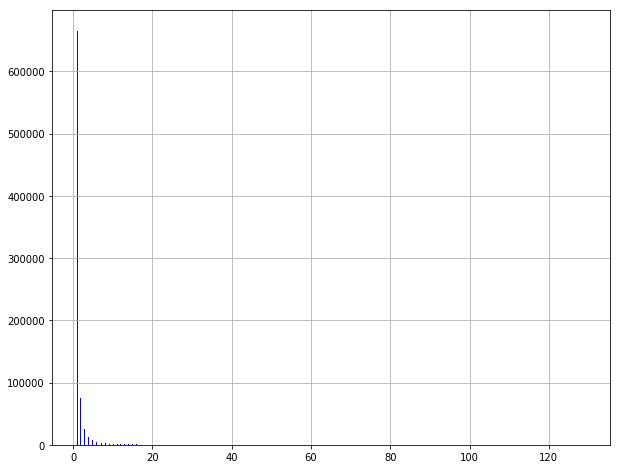

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,figsize=(10, 8))
train_df["Operation_Count"].hist(bins=500, color="blue", ax=ax)


# For Neslihan
 
To impute missing categorical data according to some distribution


In [0]:
df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Train Data.csv")
df['Departure_YMD_LMT'] = pd.to_datetime(train_df['Departure_YMD_LMT'], format='%Y%m%d')
df['Operation_YMD_LMT'] = pd.to_datetime(train_df['Operation_YMD_LMT'], format='%Y%m%d')
for col_name in df.columns:
    if df[col_name].dtype.name == 'object':
        df[col_name] = df[col_name].astype('category')
        #result_df[col_name] = result_df[col_name].astype('category')
dict = {"JW": 'Online',
        "TW": 'Online',
        "TS": 'Mobile',
        "JM": 'Mobile',
        "TY":"Counter",
        "QC":"Counter",
        "SC":"Kiosks",
        "IR":"Other",
        "?":"Other",
        "IA":"Other",
        "BD":"Other",
        "CC":"Other",
        "QR":"Other",
        "QP":"Other",
        "QA":"Other"
        }
df['Operation_Channel_Group'] = df['Operation_Channel'].map(dict)
#df = df.drop(columns = ["Terminal_Number", "Departure_Airport"])

import numpy as np
train_df['Terminal_Number'] = train_df['Terminal_Number'].replace('?', np.nan)
train_df['Operation_Channel'] = train_df['Operation_Channel'].replace('?', np.nan)
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace('?', np.nan)
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace('?', np.nan)
train_df['Inbound_Departure_Airport'] = train_df['Inbound_Departure_Airport'].replace('?', "Unknown")
train_df['Outbound_Arrival_Airport'] = train_df['Outbound_Arrival_Airport'].replace('?', "Unknown")
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace('?', np.nan)
column = df["Passenger_Title"]
df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())


KeyError: ignored

In [0]:
df.groupby("Operation_Channel_Group")['Passenger_Title'].apply(lambda x: x.value_counts())

Operation_Channel_Group           
Counter                  MISTER       230324
                         MISS         107506
                         MISSES        42584
                         ?             11753
                         DOCTOR          157
                         PROFFESOR        10
Kiosks                   MISTER        26821
                         MISS          10749
                         MISSES         3910
                         ?              1354
                         DOCTOR            9
                         PROFFESOR         1
Mobile                   MISTER        92083
                         MISS          48132
                         MISSES        17537
                         ?              2031
                         DOCTOR           62
                         PROFFESOR         3
Online                   MISTER       105085
                         MISS          63692
                         MISSES        22288
                    

## References


1.   [Impute Missing Values](https://jamesrledoux.com/code/imputation)
2.   [Is it better to drop or impute values from data sets when applying ML, or would it be better to label them as 'missing' for categorical variables?](https://www.quora.com/Is-it-better-to-drop-or-impute-values-from-data-sets-when-applying-ML-or-would-it-be-better-to-label-them-as-missing-for-categorical-variables)

